## buy and hold strategy - python


In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

In [3]:
df = fdr.DataReader('AMZN') # Amazon ticker
df['Adj Close'] = df['Close']
print(df.shape)
df.head()

(6096, 7)


,Close,Open,High,Low,Volume,Change,Adj Close
Date,,,,,,,
1997-05-15,1.96,2.44,2.50,1.93,72160000.0,-0.9962,1.96
1997-05-16,1.73,1.97,1.98,1.71,14700000.0,-0.1173,1.73
1997-05-19,1.71,1.76,1.77,1.62,6110000.0,-0.0116,1.71
1997-05-20,1.64,1.73,1.75,1.64,5470000.0,-0.0409,1.64
1997-05-21,1.43,1.64,1.65,1.37,18850000.0,-0.1280,1.43


In [4]:
# check 'null', 'infinity', ''-infinity' values 
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Close,Open,High,Low,Volume,Change,Adj Close
Date,,,,,,,


In [5]:
price_df = df.loc[:,['Adj Close']].copy()

<AxesSubplot:xlabel='Date'>

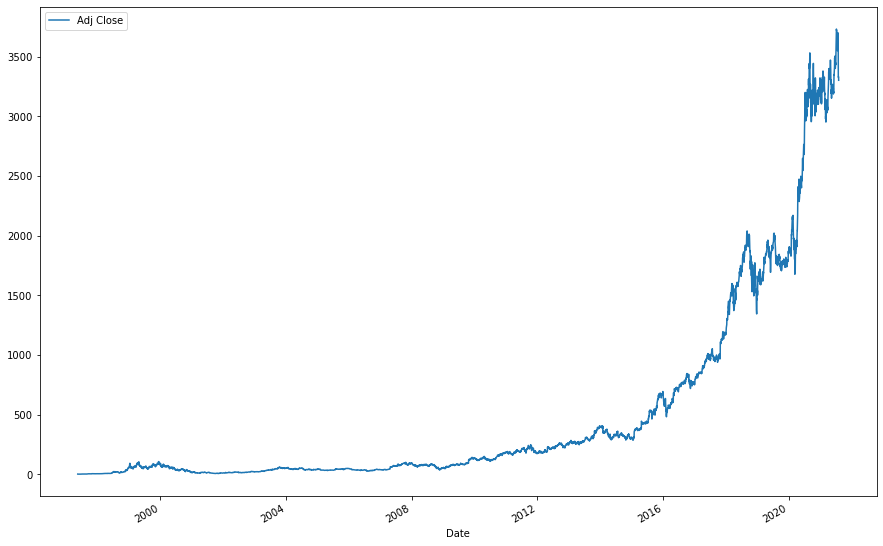

In [6]:
price_df.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

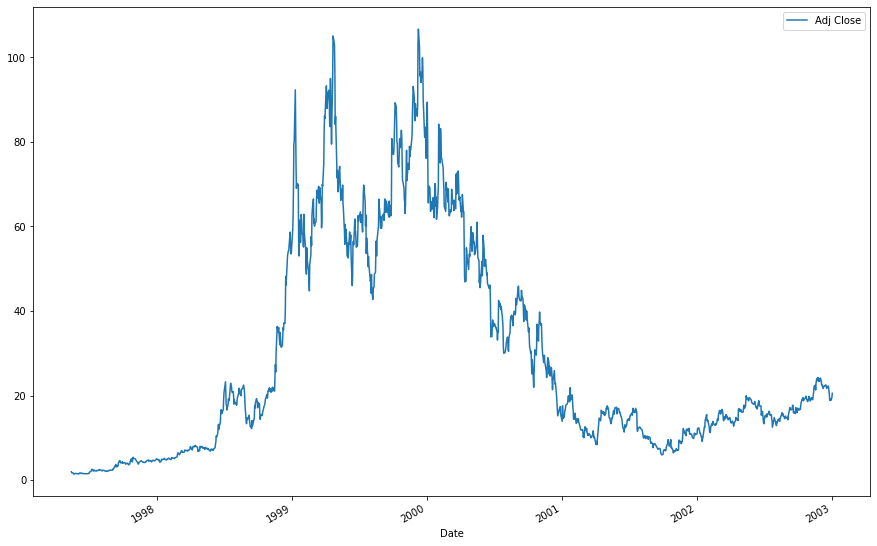

In [7]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(15,10))

#### 일별 수익률 계산
- 매수시점부터 일별 수익률을 누적 곱하면 매도시점의 종가 수익률로 계산

In [8]:
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [9]:
price_df.head()

,Adj Close,daily_rtn
Date,,
1997-05-15,1.96,NaN
1997-05-16,1.73,-0.117347
1997-05-19,1.71,-0.011561
1997-05-20,1.64,-0.040936
1997-05-21,1.43,-0.128049


In [10]:
# 누적곱 계산
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()

In [11]:
price_df.tail(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
2021-07-21,3585.20,0.003361,1829.183673
2021-07-22,3638.03,0.014736,1856.137755
2021-07-23,3656.64,0.005115,1865.632653
2021-07-26,3699.82,0.011809,1887.663265
2021-07-27,3626.39,-0.019847,1850.198980
2021-07-28,3630.32,0.001084,1852.204082
2021-07-29,3599.92,-0.008374,1836.693878
2021-07-30,3327.59,-0.075649,1697.750000
2021-08-02,3331.48,0.001169,1699.734694


<AxesSubplot:xlabel='Date'>

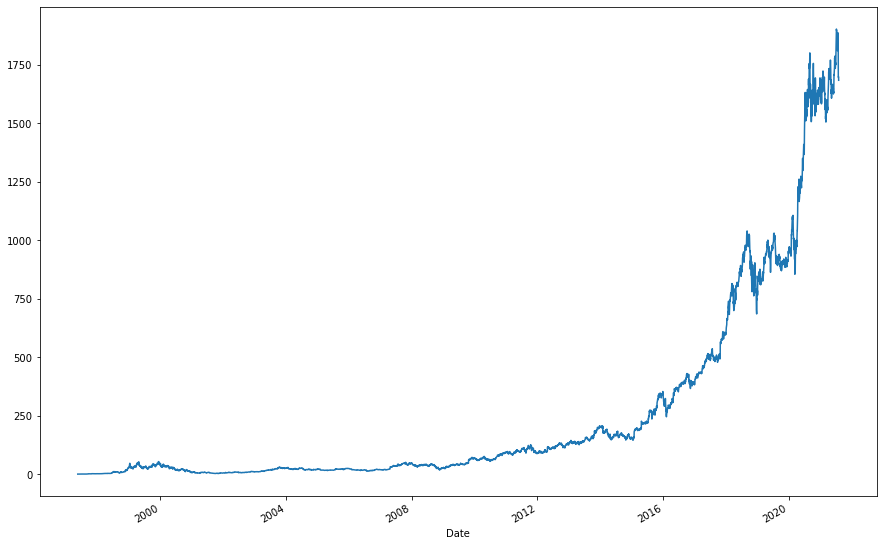

In [12]:
price_df['st_rtn'].plot(figsize=(15,10))

In [13]:
first_date = price_df.index[0]
last_date = price_df.index[-1]

print(first_date, last_date)

1997-05-15 00:00:00 2021-08-03 00:00:00


In [14]:
(price_df.loc[last_date, 'Adj Close'] / price_df.loc[first_date, 'Adj Close'])

1684.6938775510205

In [15]:
price_df.tail()

,Adj Close,daily_rtn,st_rtn
Date,,,
2021-07-28,3630.32,0.001084,1852.204082
2021-07-29,3599.92,-0.008374,1836.693878
2021-07-30,3327.59,-0.075649,1697.750000
2021-08-02,3331.48,0.001169,1699.734694
2021-08-03,3302.00,-0.008849,1684.693878


누적 수익:  1684.6938775510384


<AxesSubplot:xlabel='Date'>

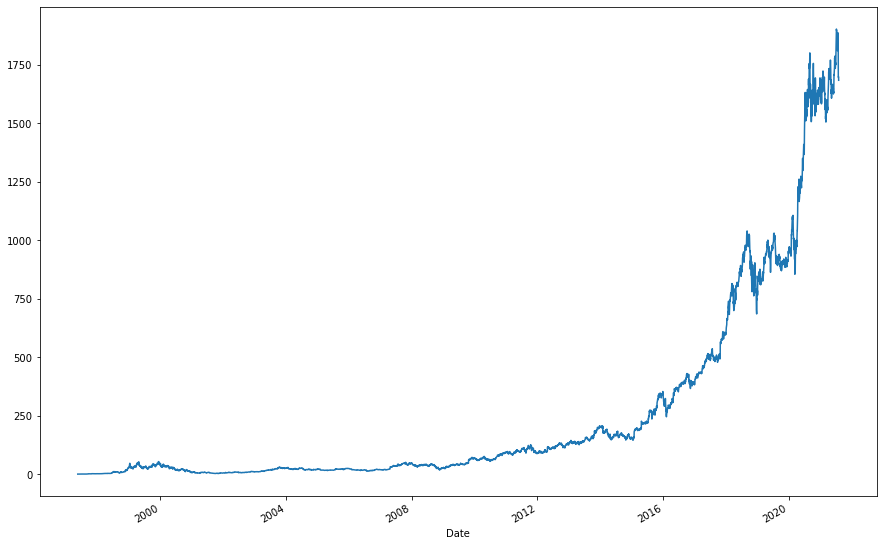

In [16]:
print('누적 수익: ', price_df.loc[last_date, 'st_rtn'])
price_df['st_rtn'].plot(figsize=(15,10))

누적 수익:  17.924221040060907


<AxesSubplot:xlabel='Date'>

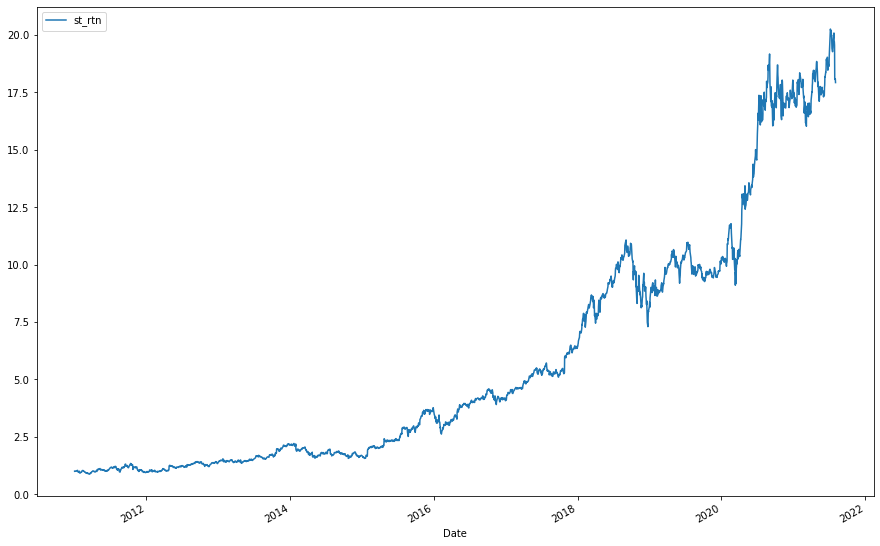

In [17]:
# 특정일을 기준으로 수익률 계산
base_date = '2011-01-03'
# DataFrame / base_date['st_rtn'] value ('st_rtn' value reset)
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date, ['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익: ', tmp_df.loc[last_date, 'st_rtn'])
tmp_df.plot(figsize=(15,10))

# Backtesting
---

<AxesSubplot:xlabel='Date'>

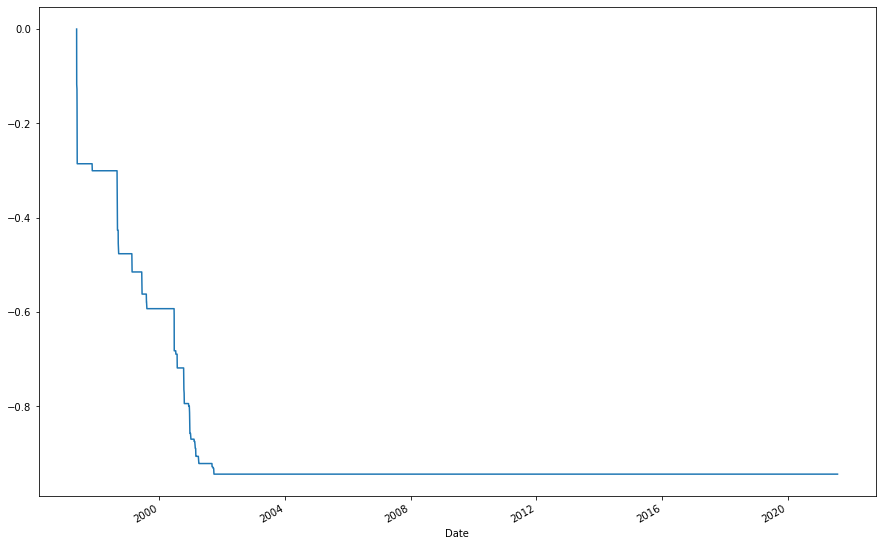

In [18]:
# 최대낙폭(MDD)
historical_max = price_df['Adj Close'].cummax() # 누적 최대값 columns 설정
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0 # 현재 종가에서 누적 최대값 대비 낙폭률 계산
historical_dd = daily_drawdown.cummin() # 누적 최소값을 사용해 최대 하락률을 계산
historical_dd.plot(figsize=(15,10)) # 최대 하락률의 추세 확인

In [19]:
price_df.head()

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.96,NaN,NaN
1997-05-16,1.73,-0.117347,0.882653
1997-05-19,1.71,-0.011561,0.872449
1997-05-20,1.64,-0.040936,0.836735
1997-05-21,1.43,-0.128049,0.729592


In [20]:
# 연평균 복리 수익률(CAGR)
## 수익률 성과를 분석할 때는 산술 평균 수익률보다 기하평균 수익률을 더 선호(복리 성질과 변동성 표현이 잘 나타남)
CAGR = price_df.loc['2021-07-28', 'st_rtn'] ** (252/len(price_df.index)) - 1 
# 샤프 지수(Sharpe)
## 위험 대비 수익성 지표. 실현 수익률의 산술평균 / 실현 수익률의 변동성으로 계산
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252)
# 변동성(Vol)
## 수익률의 표준 편차를 변동성으로 계산. 주가 변화 수익률 관점의 변동성
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252)
# 최대 낙폭(MDD)
## 투자 기간에 고점부터 저점까지 떨어진 낙폭 중 최댓값을 의미. 투자자의 고통을 측정하는 지표로 낮을수록 좋음
MDD = historical_dd.min()

In [21]:
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  36.48 %
Sharpe :  0.81
VOL :  58.12 %
MDD :  94.4 %
